## PCA

In [27]:
setwd("/nfs/lab/projects/pbmc_snATAC/pipeline/snp_array/pca_liftoverhg19//")

In [28]:
samp = read.table("../1kg_population_sample_table.tsv", sep="\t", header=T)

In [29]:
sup = read.table("../1kg_super_population_table.tsv", sep="\t", header=T)

In [30]:
samp = merge(samp, sup, by.x=2, by.y=1)

In [31]:
head(samp)

,Population,Sample,SuperPopulation.Code
,<fct>,<fct>,<fct>
1,ACB,HG02308,AFR
2,ACB,HG02255,AFR
3,ACB,HG02111,AFR
4,ACB,HG02480,AFR
5,ACB,HG01894,AFR
6,ACB,HG02478,AFR


In [32]:
pcs = read.table("all_pbmc_1KGP_ALL_HRC.eigenvec", header=T)

In [33]:
nrow(pcs)-19

[1] 2504

In [34]:
df = data.frame(Sample= pcs$IID[1:19], SuperPopulation.Code="PBMC")

In [35]:
samp2 = rbind(samp[,2:3], df)

In [36]:
table(samp2$SuperPopulation.Code)


 AFR  AMR  EAS  EUR  SAS PBMC 
1018  535  617  669  661   19 

In [37]:
table(as.numeric(samp2$SuperPopulation.Code))


   1    2    3    4    5    6 
1018  535  617  669  661   19 

In [38]:
col = rainbow(6)

In [39]:
pbmcs = subset(pcs, grepl("PBMC", pcs$IID))

In [40]:
pbmcs$samp = stringr::str_split_fixed(pbmcs$IID, "-", 2)[,2]

In [41]:
var = readLines("all_pbmc_1KGP_ALL_HRC.eigenval")

var_expl =paste0( "PC", 1:20, " (",round((as.numeric(var)/sum(as.numeric(var)))*100,1), "%)")

In [43]:
pdf("PCA_pops_hg19_liftover.pdf")
par(mfrow=c(2,2), mar=c(4,4,1,1))
plot(PC2~PC1, pcs, pch=21, bg =  col[as.numeric(samp2$SuperPopulation.Code[match(pcs$IID, samp2$Sample)])], xlab=var_expl[1], ylab=var_expl[2])
legend("topright", legend = levels(samp2$SuperPopulation.Code), pch = 21, pt.bg = col )
plot(PC2~PC1, pbmcs, pch=21, bg =  6)
text (PC2~PC1, pbmcs, labels= pbmcs$samp, pos=4)
 plot(PC4~PC3, pcs, pch=21, bg =  col[as.numeric(samp2$SuperPopulation.Code[match(pcs$IID, samp2$Sample)])], xlab=var_expl[3], ylab=var_expl[4])
legend("topleft", legend = levels(samp2$SuperPopulation.Code), pch = 21, pt.bg = col )
plot(PC4~PC3, pbmcs, pch=21, bg =  6)
text (PC4~PC3, pbmcs, labels= pbmcs$samp, pos=2)
dev.off()

png 
  2

In [44]:
var_expl

[1] "PC1 (45.6%)" "PC2 (27.3%)" "PC3 (8.6%)"  "PC4 (6.6%)"  "PC5 (1.6%)" 
 [6] "PC6 (1.2%)"  "PC7 (1.1%)"  "PC8 (0.8%)"  "PC9 (0.7%)"  "PC10 (0.7%)"
[11] "PC11 (0.7%)" "PC12 (0.6%)" "PC13 (0.6%)" "PC14 (0.6%)" "PC15 (0.6%)"
[16] "PC16 (0.6%)" "PC17 (0.5%)" "PC18 (0.5%)" "PC19 (0.5%)" "PC20 (0.5%)"

In [45]:
pdf("PCA_pops_hg19_liftover_12pcs.pdf", height = 10, width = 10)
par(mfrow=c(2,2), mar=c(4,4,1,1))
plot(PC2~PC1, pcs, pch=21, bg =  col[as.numeric(samp2$SuperPopulation.Code[match(pcs$IID, samp2$Sample)])], xlab=var_expl[1], ylab=var_expl[2])
legend("topright", legend = levels(samp2$SuperPopulation.Code), pch = 21, pt.bg = col )


plot(PC4~PC3, pcs, pch=21, bg =  col[as.numeric(samp2$SuperPopulation.Code[match(pcs$IID, samp2$Sample)])], xlab=var_expl[3], ylab=var_expl[4])
legend("topleft", legend = levels(samp2$SuperPopulation.Code), pch = 21, pt.bg = col )


plot(PC6~PC5, pcs, pch=21, bg =  col[as.numeric(samp2$SuperPopulation.Code[match(pcs$IID, samp2$Sample)])], xlab=var_expl[5], ylab=var_expl[6])
legend("topright", legend = levels(samp2$SuperPopulation.Code), pch = 21, pt.bg = col )


plot(PC8~PC7, pcs, pch=21, bg =  col[as.numeric(samp2$SuperPopulation.Code[match(pcs$IID, samp2$Sample)])], xlab=var_expl[7], ylab=var_expl[8])
legend("topright", legend = levels(samp2$SuperPopulation.Code), pch = 21, pt.bg = col )

plot(PC10~PC9, pcs, pch=21, bg =  col[as.numeric(samp2$SuperPopulation.Code[match(pcs$IID, samp2$Sample)])], xlab=var_expl[9], ylab=var_expl[10])
legend("bottomright", legend = levels(samp2$SuperPopulation.Code), pch = 21, pt.bg = col )

plot(PC12~PC11, pcs, pch=21, bg =  col[as.numeric(samp2$SuperPopulation.Code[match(pcs$IID, samp2$Sample)])], xlab=var_expl[11], ylab=var_expl[12])
legend("topright", legend = levels(samp2$SuperPopulation.Code), pch = 21, pt.bg = col )
dev.off()

png 
  2

*Remove pbmc samples that are not included in the paper for the supp  figure*

In [46]:
setwd("/nfs/lab/projects/pbmc_snATAC/analysis_v2/figures/")

In [47]:
pcs_sub = pcs[-c(10, 12:15,19),]

In [48]:
pbmcs_sub = pbmcs[-c(10,12:15,19),]

In [49]:
pcs_sub = pcs_sub[order(pcs_sub$IID, decreasing = T),]

In [65]:
pdf("PCA_pops_hg19_liftover.pdf", width = 8.5, height = 10)
par(mfrow=c(3,2), mar=c(4,5,2,2))
plot(PC2~PC1, pcs_sub, pch=NA, bg =  col[as.numeric(samp2$SuperPopulation.Code[match(pcs_sub$IID, samp2$Sample)])], xlab=var_expl[1], ylab=var_expl[2])
legend("bottomright", legend = levels(samp2$SuperPopulation.Code), pch = 21, pt.bg = col , pt.cex=1.5)
plot(PC2~PC1, pbmcs_sub, cex=1.5,pch=21, bg =  6)
text (PC2~PC1, pbmcs_sub, labels= paste0('PBMC',pbmcs_sub$samp), pos=4, cex=1)

plot(PC4~PC3, pcs_sub, pch=NA, bg =  col[as.numeric(samp2$SuperPopulation.Code[match(pcs_sub$IID, samp2$Sample)])], xlab=var_expl[3], ylab=var_expl[4])
legend("topleft", legend = levels(samp2$SuperPopulation.Code), pch = 21, pt.bg = col , pt.cex=1.5)
plot(PC4~PC3, pbmcs_sub, cex=1.5,pch=21, bg =  6)
text (PC4~PC3, pbmcs_sub, labels= paste0('PBMC',pbmcs_sub$samp), pos=4, cex=1)

 plot(PC6~PC5, pcs_sub, pch=NA, bg =  col[as.numeric(samp2$SuperPopulation.Code[match(pcs_sub$IID, samp2$Sample)])], xlab=var_expl[5], ylab=var_expl[6])
 legend("bottomleft", legend = levels(samp2$SuperPopulation.Code), pch = 21, pt.bg = col , pt.cex=1.5)
 plot(PC6~PC5, pbmcs_sub , cex=1.5, pch=21, bg =  6)
 text (PC6~PC5, pbmcs_sub, labels= paste0('PBMC',pbmcs_sub$samp), pos=4)

dev.off()

png 
  2

In [63]:
png("PCA_pops_hg19_liftover_1.png", width = 3.326, height = 2.5414, units = 'in', res = 300)
par( mar=c(0,0,0,0))
plot(PC2~PC1, pcs_sub, pch=21,  cex=1.1,
     bg =  col[as.numeric(samp2$SuperPopulation.Code[match(pcs_sub$IID, samp2$Sample)])], xlab=var_expl[1], ylab=var_expl[2])
dev.off()
png("PCA_pops_hg19_liftover_2.png", width = 3.326, height = 2.5414, units = 'in', res = 300)
par( mar=c(0,0,0,0))
plot(PC4~PC3, pcs_sub, pch=21,  cex=1.1,
      bg =  col[as.numeric(samp2$SuperPopulation.Code[match(pcs_sub$IID, samp2$Sample)])], xlab=var_expl[3], ylab=var_expl[4])
dev.off()
png("PCA_pops_hg19_liftover_3.png", width = 3.326, height = 2.5414, units = 'in', res = 300)
par( mar=c(0,0,0,0))
plot(PC6~PC5, pcs_sub, pch=21,  cex=1.1,
      bg =  col[as.numeric(samp2$SuperPopulation.Code[match(pcs_sub$IID, samp2$Sample)])], xlab=var_expl[5], ylab=var_expl[6])
dev.off()


png 
  2

png 
  2

png 
  2

In [52]:
write.table(pbmcs_sub[,3:6], '/nfs/lab/projects/pbmc_snATAC/analysis_v2/rasqual/covariates/4_gt_pcs',
            sep="\t", row.names=F, col.names=F, quote=F)

In [53]:
write.table(pbmcs_sub[,3:8], '/nfs/lab/projects/pbmc_snATAC/analysis_v2/rasqual/covariates/6_gt_pcs',
            sep="\t", row.names=F, col.names=F, quote=F)

## Imputation results

In [58]:
library(data.table)

In [51]:
setwd("/nfs/lab/projects/pbmc_snATAC/pipeline/snp_array/post_imputation_topmed")

In [59]:
info =fread("all_vars_topmend_imputation_info_test.txt", header=T)

In [65]:
summary(info$MAF)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00804 0.02719 0.12859 0.17002 0.28882 0.50000 

In [66]:
summary(info$Rsq)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3000  0.9902  0.9981  0.9733  0.9999  1.0000 

In [63]:
table(info$Genotyped)


Genotyped   Imputed 
  1325212   7762343 

In [70]:
sum(info$Rsq <=0.7)

[1] 237643

In [71]:
sum(info$MAF <=0.01)

[1] 40184

##josh's

In [72]:
jo = fread('/nfs/lab/projects/pbmc_snATAC/analysis/WASP/vcfs/PBMC.info.gz', header=T)

In [73]:
head(jo)

SNP,REF(0),ALT(1),ALT_Frq,MAF,AvgCall,Rsq,Genotyped,LooRsq,EmpR,EmpRsq,Dose0,Dose1
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1:11171:CCTTG:C,CCTTG,C,0.04254,0.04254,0.97435,0.42699,Imputed,-,-,-,-,-
chr1:73632:CA:C,CA,C,0.02869,0.02869,0.99734,0.91233,Imputed,-,-,-,-,-
chr1:80346:C:G,C,G,0.11353,0.11353,0.93680,0.49070,Imputed,-,-,-,-,-
chr1:98667:T:C,T,C,0.12921,0.12921,0.93492,0.51098,Imputed,-,-,-,-,-
chr1:457841:A:C,A,C,0.05604,0.05604,0.97008,0.51532,Imputed,-,-,-,-,-
chr1:607218:GAAGT:G,GAAGT,G,0.01337,0.01337,0.98663,0.41946,Imputed,-,-,-,-,-


In [74]:
sum(jo$Rsq <=0.7)

[1] 196063

In [76]:
sum(jo$MAF <=0.01)

[1] 6421

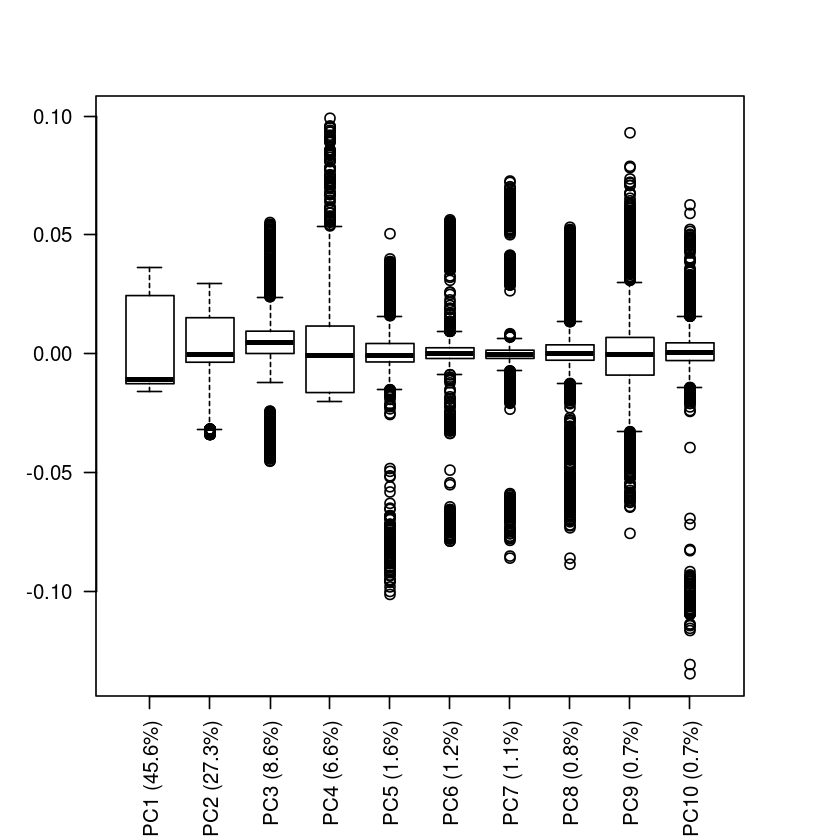

In [83]:
par(mar=c(6,4,4,4))
boxplot(pcs[,3:12], names = var_expl[1:10], las=2)